<a href="https://colab.research.google.com/github/kvsharma13/supermarket-customer-clustering/blob/main/customer_segmentation_kvsharma13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# STEP 1: Upload CSV
from google.colab import files
uploaded = files.upload()

Saving supermarket_data.csv to supermarket_data.csv


In [14]:
# STEP 2: Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# Load dataset
df = pd.read_csv(next(iter(uploaded)))

In [16]:
# STEP 3: Preprocessing
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])  # Male=1, Female=0
X = df[['Age', 'Gender', 'Annual Income', 'Spending Score']]
X_scaled = StandardScaler().fit_transform(X)

In [18]:
# STEP 4: PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)


pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

In [19]:
# STEP 5: KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [20]:
# STEP 6: Add readable labels
label_map = {
    0: "Cautious Professionals",
    1: "Affluent Shoppers",
    2: "Premium Customers",
    3: "Budget-Conscious Seniors",
    4: "Trendy Young Shoppers"
}
df['Cluster_Label'] = df['Cluster'].map(label_map)

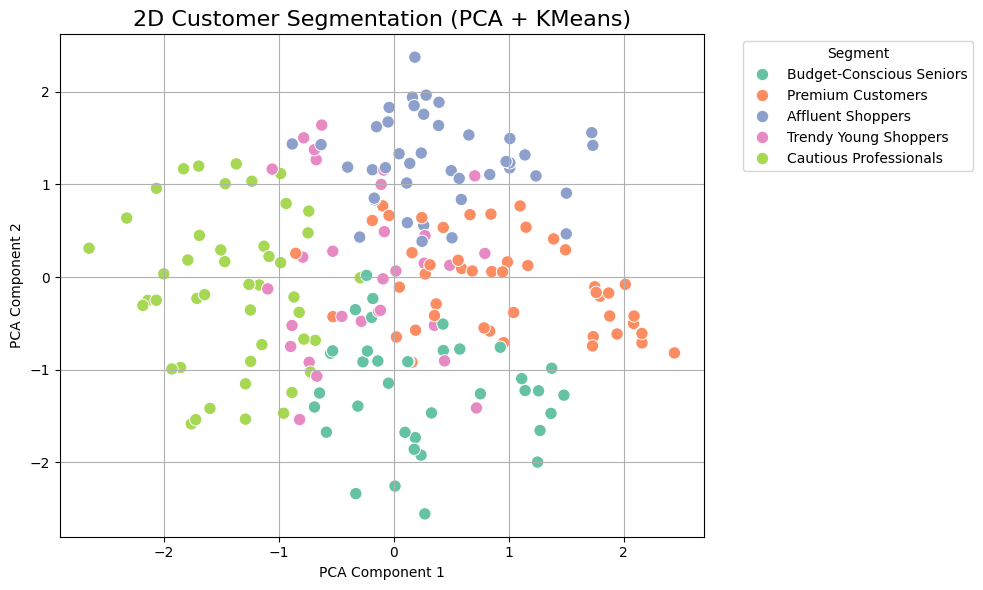

In [21]:
# STEP 7: 2D Visualization
df['PCA1'] = X_pca_2d[:, 0]
df['PCA2'] = X_pca_2d[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster_Label', palette='Set2', s=80)
plt.title("2D Customer Segmentation (PCA + KMeans)", fontsize=16)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Segment", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

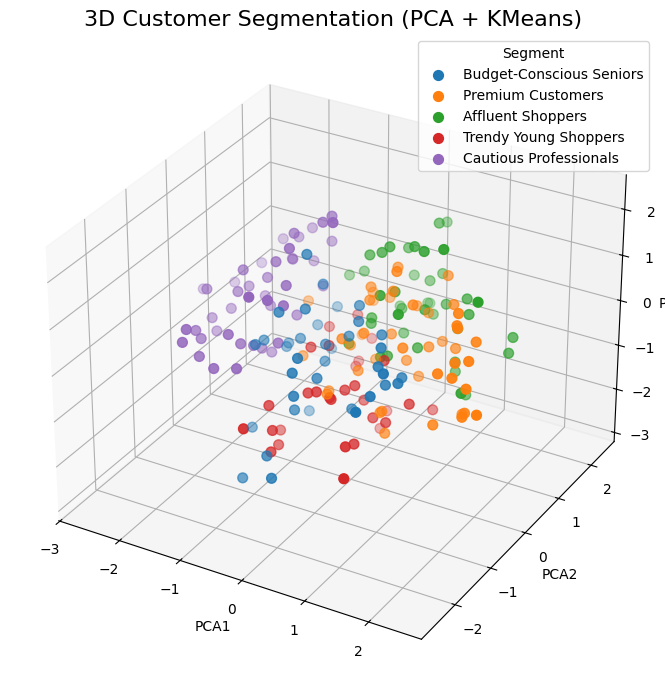

In [27]:
# STEP 8: 3D Visualization
df['PCA3'] = X_pca_3d[:, 2]  # FIXED LINE HERE
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
for label in df['Cluster_Label'].unique():
    cluster_df = df[df['Cluster_Label'] == label]
    ax.scatter(cluster_df['PCA1'], cluster_df['PCA2'], cluster_df['PCA3'], label=label, s=50)
ax.set_title("3D Customer Segmentation (PCA + KMeans)", fontsize=16)
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.legend(title="Segment")
plt.tight_layout()
plt.show()


In [30]:
# STEP 10: Ask to download
print("\n✅ Segmentation complete. The dataset includes PCA components and cluster info.")
user_input = input("👉 Type 'yes' to download the final dataset, or anything else to skip: ")

if user_input.strip().lower() == 'yes':
    output_filename = "segmented_customers_with_pca.csv"
    df.to_csv(output_filename, index=False)
    files.download(output_filename)
    print("📁 File download started: segmented_customers_with_pca.csv")
else:
    print("❌ Download skipped.")


✅ Segmentation complete. The dataset includes PCA components and cluster info.
👉 Type 'yes' to download the final dataset, or anything else to skip: yes


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📁 File download started: segmented_customers_with_pca.csv
